In [3]:
root_data = '../datasets'
out_root='../out'
import evalseg,os,glob,json
evalseg.reload()
pre_dataset_res={}
pre_case_res={}
pre_class_res={}
total=evalseg.metrics.Average()
for dataset_name in sorted([d for d in os.listdir(root_data) if os.path.isdir(f'{root_data}/{d}')]):
    dataset = evalseg.io.Dataset(f'{root_data}/{dataset_name}')
    pre_dataset_res[dataset_name]=evalseg.metrics.Average()
    pre_case_res[dataset_name]={}
    pre_class_res[dataset_name]={}
    for case in sorted(dataset.get_available_ids()):
        out_path=f'{out_root}/{dataset_name}-{case}.json'
        if not os.path.isfile(out_path):continue
        pre_case_res[dataset_name][case]=evalseg.metrics.Average()
        
        with open(out_path,'r') as f:
            metric_data=json.load(f)
        
        metric_data= evalseg.metrics.cm_calculate(metric_data,'macro')

        pre_class_res[dataset_name][case]=metric_data

        # pre_case_res[dataset_name][case].add()
        pre_dataset_res[dataset_name].add(metric_data)
        total.add(metric_data)
    
    pre_dataset_res[dataset_name]= evalseg.metrics.cm_calculate(pre_dataset_res[dataset_name].get(),'micro')

total= evalseg.metrics.cm_calculate(total.get(),'micro')
        


dict_keys(['SS', 'Tversky', 'WCE', 'SampleDice', '2-CE', 'Asym', 'TopK70', 'TopK90', 'SampleSquareDice', 'GDice', 'pGDice', 'TopK30', 'Dice', 'DiceTopK10', 'ExpLog', 'DiceHD', 'Iou', '2-DiceTopK10', '2-DiceFocal', 'DiceCE', 'Focal', 'CE', 'FocalTversky', '2-Dice', 'TopK50', 'DiceBD', 'SquareDice', 'pCE', 'Lovasz', '2-DiceCE', 'DiceFocal', '2-TopK10', 'TopK10'])


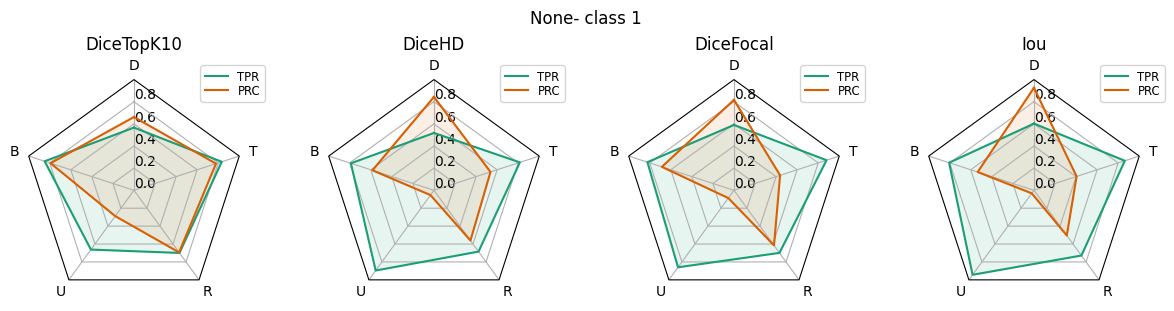

===============1===============


hd                   voxel                               \
              avg    max   95th micro-prc micro-tpr micro-f1 micro-iou   
Iou         16.44  77.44  41.77      0.47      0.86     0.61      0.44   
DiceHD      17.43  92.44  64.58      0.54      0.78     0.64      0.47   
DiceFocal   17.15  56.02  40.97      0.53      0.88     0.66      0.49   
DiceTopK10   4.15  61.97  32.76      0.75      0.81     0.78      0.64   

                                                                      nsd  \
           micro-vs macro-prc macro-tpr macro-f1 macro-iou macro-vs   t=1   
Iou            0.71      0.43      0.86     0.57      0.40     0.66  0.27   
DiceHD         0.82      0.54      0.82     0.65      0.48     0.80  0.28   
DiceFocal      0.75      0.48      0.88     0.61      0.45     0.69  0.29   
DiceTopK10     0.96      0.78      0.83     0.81      0.68     0.97  0.40   

                  
             t=5  
Iou         0.75  
DiceHD      0.75  
DiceFocal   0.76  
DiceTopK10  0.92

In [71]:
print(total.keys())
evalseg.reload()
total2={k:total[k] for k in ['DiceTopK10','DiceHD','DiceFocal','Iou']}
evalseg.ui.plot_full_metric_multi(total2)

In [72]:
-1//10+1

0

In [18]:
a={'SS': {'hd': {'avg': 17.109375, 'max': 88.71875, '95th': 67.9169921875}, 'voxel': {'micro-prc': 0.41345827651980194, 'micro-tpr': 0.9352812587164104, 'micro-f1': 0.5734197005264341, 'micro-iou': 0.40195820816966155, 'micro-vs': 0.6131032207721941, 'macro-prc': 0.3822505498521893, 'macro-tpr': 0.9470709921263492, 'macro-f1': 0.5396855159316256, 'macro-iou': 0.3727747563126238, 'macro-vs': 0.571687169329838}, 'nsd': {'t=1': 0.1865683224288608, 't=5': 0.7358969678897072}}, 'Tversky': {'hd': {'avg': 16.068359375, 'max': 57.8984375, '95th': 42.615234375}, 'voxel': {'micro-prc': 0.4166498646587142, 'micro-tpr': 0.9230781817129132, 'micro-f1': 0.5741426848654467, 'micro-iou': 0.4026691099703921, 'micro-vs': 0.6219917031451345, 'macro-prc': 0.38192513676243317, 'macro-tpr': 0.9226394585005958, 'macro-f1': 0.53522565062273, 'macro-iou': 0.3696245523884751, 'macro-vs': 0.580036126369708}, 'nsd': {'t=1': 0.23570820266135256, 't=5': 0.7131193020890655}}, 'WCE': {'hd': {'avg': 21.3984375, 'max': 93.5, '95th': 76.53515625}, 'voxel': {'micro-prc': 0.23713776816737495, 'micro-tpr': 0.9958461323543982, 'micro-f1': 0.38305579478487306, 'micro-iou': 0.23690343568151723, 'micro-vs': 0.3846567146017583, 'macro-prc': 0.21940972204826364, 'macro-tpr': 0.9962312855250689, 'macro-f1': 0.35794200135395016, 'macro-iou': 0.21921087048198473, 'macro-vs': 0.3593335848571904}, 'nsd': {'t=1': 0.013392950219482133, 't=5': 0.29223064433642243}}, 'SampleDice': {'hd': {'avg': 10.533203125, 'max': 93.34375, '95th': 61.0859375}, 'voxel': {'micro-prc': 0.6250464557199122, 'micro-tpr': 0.7448431173124559, 'micro-f1': 0.6797017237007651, 'micro-iou': 0.5148149111488728, 'micro-vs': 0.9125501325420298, 'macro-prc': 0.6847410787609205, 'macro-tpr': 0.7854384990333967, 'macro-f1': 0.7311302508199553, 'macro-iou': 0.5833061235826251, 'macro-vs': 0.9285383332036572}, 'nsd': {'t=1': 0.3322197120835809, 't=5': 0.8444993840609705}}, '2-CE': {'hd': {'avg': 3.27734375, 'max': 86.625, '95th': 8.3544921875}, 'voxel': {'micro-prc': 0.9084816170690471, 'micro-tpr': 0.7278458574690222, 'micro-f1': 0.8081885208393556, 'micro-iou': 0.6781247062162237, 'micro-vs': 0.8896090407250506, 'macro-prc': 0.9060219984416228, 'macro-tpr': 0.770090836619238, 'macro-f1': 0.8305237299548751, 'macro-iou': 0.7121897652453284, 'macro-vs': 0.9169330047003853}, 'nsd': {'t=1': 0.4398724057416329, 't=5': 0.9422518155442485}}, 'Asym': {'hd': {'avg': 16.181640625, 'max': 61.03125, '95th': 41.2294921875}, 'voxel': {'micro-prc': 0.47154828087514056, 'micro-tpr': 0.9090054279431701, 'micro-f1': 0.6209636601554105, 'micro-iou': 0.4502928353194749, 'micro-vs': 0.6831292080293405, 'macro-prc': 0.47900637987981054, 'macro-tpr': 0.9117875237333983, 'macro-f1': 0.6279960339766623, 'macro-iou': 0.4578343456085161, 'macro-vs': 0.6887089127068257}, 'nsd': {'t=1': 0.2408037990926816, 't=5': 0.7216251761943949}}, 'TopK70': {'hd': {'avg': 11.40625, 'max': 56.1953125, '95th': 39.34033203125}, 'voxel': {'micro-prc': 0.7255122770615293, 'micro-tpr': 0.7045245305005529, 'micro-f1': 0.7148593929460886, 'micro-iou': 0.55625599920974, 'micro-vs': 0.9853236319161682, 'macro-prc': 0.7288720923403085, 'macro-tpr': 0.7491163906043776, 'macro-f1': 0.7372634451176501, 'macro-iou': 0.5854849629953557, 'macro-vs': 0.9535842229894429}, 'nsd': {'t=1': 0.31798257957685255, 't=5': 0.8377672521904131}}, 'TopK90': {'hd': {'avg': 9.7734375, 'max': 56.3125, '95th': 40.06201171875}, 'voxel': {'micro-prc': 0.6998973654497362, 'micro-tpr': 0.6958895472557434, 'micro-f1': 0.6978827024688725, 'micro-iou': 0.5359658331156445, 'micro-vs': 0.9971286317721174, 'macro-prc': 0.7168871338731795, 'macro-tpr': 0.7594062373469681, 'macro-f1': 0.7357865857913797, 'macro-iou': 0.5866745871765485, 'macro-vs': 0.9511864394688774}, 'nsd': {'t=1': 0.33062165762070095, 't=5': 0.8557338364252178}}, 'SampleSquareDice': {'hd': {'avg': 3.263671875, 'max': 58.76953125, '95th': 5.9736328125}, 'voxel': {'micro-prc': 0.6069227916469747, 'micro-tpr': 0.8631454420807829, 'micro-f1': 0.7127003574179094, 'micro-iou': 0.5536456828239242, 'micro-vs': 0.8257069675015059, 'macro-prc': 0.7321218653559359, 'macro-tpr': 0.8483068235025071, 'macro-f1': 0.7723717818415599, 'macro-iou': 0.6376784633473089, 'macro-vs': 0.8684152138848428}, 'nsd': {'t=1': 0.35231311620979594, 't=5': 0.926091250044198}}, 'GDice': {'hd': {'avg': 16.69921875, 'max': 84.34375, '95th': 41.30615234375}, 'voxel': {'micro-prc': 0.7116760457647933, 'micro-tpr': 0.638575882253576, 'micro-f1': 0.6731422242941394, 'micro-iou': 0.5073262192158414, 'micro-vs': 0.9458618336362314, 'macro-prc': 0.6669828182000452, 'macro-tpr': 0.6957712588547772, 'macro-f1': 0.656937075962561, 'macro-iou': 0.4902410745934723, 'macro-vs': 0.8116274612327383}, 'nsd': {'t=1': 0.29389734444885063, 't=5': 0.7874011917364305}}, 'pGDice': {'hd': {'avg': 8.90234375, 'max': 56.765625, '95th': 42.80078125}, 'voxel': {'micro-prc': 0.8936135448716183, 'micro-tpr': 0.3728723427423722, 'micro-f1': 0.5261821680453049, 'micro-iou': 0.35702363929769326, 'micro-vs': 0.5888298422982683, 'macro-prc': 0.8820382029827891, 'macro-tpr': 0.48621180428058963, 'macro-f1': 0.5947232346745157, 'macro-iou': 0.4389422158292402, 'macro-vs': 0.6903869402407382}, 'nsd': {'t=1': 0.2574473464149556, 't=5': 0.7435715731529827}}, 'TopK30': {'hd': {'avg': 12.064453125, 'max': 85.625, '95th': 40.38232421875}, 'voxel': {'micro-prc': 0.7008845688870772, 'micro-tpr': 0.7258060117555566, 'micro-f1': 0.7131226278968833, 'micro-iou': 0.5541556730383531, 'micro-vs': 0.9825319917248483, 'macro-prc': 0.7171159405620631, 'macro-tpr': 0.753548518945292, 'macro-f1': 0.7347776093927187, 'macro-iou': 0.5821368223495604, 'macro-vs': 0.9758226928941569}, 'nsd': {'t=1': 0.31341708471839275, 't=5': 0.836413576579072}}, 'Dice': {'hd': {'avg': 17.13671875, 'max': 88.1875, '95th': 41.037109375}, 'voxel': {'micro-prc': 0.5668786140869557, 'micro-tpr': 0.7409106874744648, 'micro-f1': 0.6423102125475675, 'micro-iou': 0.4730958820493191, 'micro-vs': 0.8669265200584138, 'macro-prc': 0.5406239286495482, 'macro-tpr': 0.7816900352979507, 'macro-f1': 0.6330660552807865, 'macro-iou': 0.4633965720700558, 'macro-vs': 0.8184170640201058}, 'nsd': {'t=1': 0.2845160806798724, 't=5': 0.7541638017400121}}, 'DiceTopK10': {'hd': {'avg': 4.1494140625, 'max': 61.96875, '95th': 32.7646484375}, 'voxel': {'micro-prc': 0.7542224627804611, 'micro-tpr': 0.812430732503006, 'micro-f1': 0.7822402540018584, 'micro-iou': 0.6423668190912979, 'micro-vs': 0.9628454658003464, 'macro-prc': 0.7788766224352326, 'macro-tpr': 0.8339263214048773, 'macro-f1': 0.8054389767858678, 'macro-iou': 0.6760757584189453, 'macro-vs': 0.9656378568571966}, 'nsd': {'t=1': 0.39634531330388434, 't=5': 0.9189594150633782}}, 'ExpLog': {'hd': {'avg': 15.923828125, 'max': 58.28125, '95th': 41.501953125}, 'voxel': {'micro-prc': 0.4398890536486708, 'micro-tpr': 0.9219164514001641, 'micro-f1': 0.5955886885500195, 'micro-iou': 0.42408866404085316, 'micro-vs': 0.6460380017794065, 'macro-prc': 0.40934278579284467, 'macro-tpr': 0.9156255739202046, 'macro-f1': 0.5633088419059875, 'macro-iou': 0.39471239202775465, 'macro-vs': 0.6145103902461704}, 'nsd': {'t=1': 0.24889609974475774, 't=5': 0.7138581824541208}}, 'DiceHD': {'hd': {'avg': 17.4296875, 'max': 92.4375, '95th': 64.583984375}, 'voxel': {'micro-prc': 0.5399477429870849, 'micro-tpr': 0.783448015559731, 'micro-f1': 0.6392914418230904, 'micro-iou': 0.4698276778426461, 'micro-vs': 0.8160034358564106, 'macro-prc': 0.537177209428952, 'macro-tpr': 0.8157362967258253, 'macro-f1': 0.6468527306658964, 'macro-iou': 0.47819030587175615, 'macro-vs': 0.795464377304095}, 'nsd': {'t=1': 0.2844282355349126, 't=5': 0.7501717996188175}}, 'Iou': {'hd': {'avg': 16.439453125, 'max': 77.4375, '95th': 41.7744140625}, 'voxel': {'micro-prc': 0.47054014335257754, 'micro-tpr': 0.8604194664455153, 'micro-f1': 0.6083713649119882, 'micro-iou': 0.437169743973297, 'micro-vs': 0.7070690047798749, 'macro-prc': 0.42949357644689845, 'macro-tpr': 0.8627360598264846, 'macro-f1': 0.5659944858585071, 'macro-iou': 0.4002843906009662, 'macro-vs': 0.6565447569620593}, 'nsd': {'t=1': 0.27373491679179085, 't=5': 0.7486793091594823}}, '2-DiceTopK10': {'hd': {'avg': 2.064453125, 'max': 77.390625, '95th': 3.55712890625}, 'voxel': {'micro-prc': 0.8934587304459701, 'micro-tpr': 0.8071664034050461, 'micro-f1': 0.8481182773307213, 'micro-iou': 0.7362968955311606, 'micro-vs': 0.9492584665931012, 'macro-prc': 0.9053401973840712, 'macro-tpr': 0.8252680496810216, 'macro-f1': 0.86340059242258, 'macro-iou': 0.7605803905625745, 'macro-vs': 0.9535147974285126}, 'nsd': {'t=1': 0.4852383130753559, 't=5': 0.9749382411138596}}, '2-DiceFocal': {'hd': {'avg': 11.109375, 'max': 84.8125, '95th': 37.6474609375}, 'voxel': {'micro-prc': 0.5685978890749359, 'micro-tpr': 0.9235805073551865, 'micro-f1': 0.7038600864733495, 'micro-iou': 0.5430489082923399, 'micro-vs': 0.7621044379596571, 'macro-prc': 0.54947273220354, 'macro-tpr': 0.914483242318046, 'macro-f1': 0.6861337768949702, 'macro-iou': 0.5230892727353819, 'macro-vs': 0.7499390912662759}, 'nsd': {'t=1': 0.35931316389834406, 't=5': 0.8384903786681713}}, 'DiceCE': {'hd': {'avg': 13.95703125, 'max': 62.046875, '95th': 38.615234375}, 'voxel': {'micro-prc': 0.6696949772750477, 'micro-tpr': 0.8216313093320037, 'micro-f1': 0.7379185579711518, 'micro-iou': 0.584690000628109, 'micro-vs': 0.8981199933086956, 'macro-prc': 0.6263221724347153, 'macro-tpr': 0.8378226775929642, 'macro-f1': 0.7106708645643152, 'macro-iou': 0.5538476260743654, 'macro-vs': 0.851253905543932}, 'nsd': {'t=1': 0.34021149166678966, 't=5': 0.8197272689753734}}, 'Focal': {'hd': {'avg': 17.1162109375, 'max': 57.1875, '95th': 41.304492187500045}, 'voxel': {'micro-prc': 0.6685027935812042, 'micro-tpr': 0.5830184480528416, 'micro-f1': 0.6228361678352213, 'micro-iou': 0.4522652865872299, 'micro-vs': 0.9316956495139097, 'macro-prc': 0.6370300884136364, 'macro-tpr': 0.6684826631400071, 'macro-f1': 0.6207469897223706, 'macro-iou': 0.45008441435783975, 'macro-vs': 0.779886559320058}, 'nsd': {'t=1': 0.25571893186059463, 't=5': 0.7357461964383996}}, 'CE': {'hd': {'avg': 16.181640625, 'max': 56.234375, '95th': 40.77099609375}, 'voxel': {'micro-prc': 0.6738389821103785, 'micro-tpr': 0.6742366395486352, 'micro-f1': 0.6740327522162275, 'micro-iou': 0.5083385694364714, 'micro-vs': 0.9997050184486151, 'macro-prc': 0.6363212856505069, 'macro-tpr': 0.7519373658841144, 'macro-f1': 0.6592409632188785, 'macro-iou': 0.49275368316410506, 'macro-vs': 0.7918397384190066}, 'nsd': {'t=1': 0.28849156033942114, 't=5': 0.7769753571488754}}, 'FocalTversky': {'hd': {'avg': 11.90234375, 'max': 57.09375, '95th': 39.2861328125}, 'voxel': {'micro-prc': 0.5077914139667138, 'micro-tpr': 0.9288611988519175, 'micro-f1': 0.6566158781266717, 'micro-iou': 0.4887825245627322, 'micro-vs': 0.7069091155847791, 'macro-prc': 0.5359431780113505, 'macro-tpr': 0.9273994172052278, 'macro-f1': 0.6781743771100945, 'macro-iou': 0.5141073048302828, 'macro-vs': 0.7313753012461475}, 'nsd': {'t=1': 0.25846397052738274, 't=5': 0.7967881123121319}}, '2-Dice': {'hd': {'avg': 19.029296875, 'max': 124.0, '95th': 74.61328125}, 'voxel': {'micro-prc': 0.5977414265179757, 'micro-tpr': 0.8399495601695587, 'micro-f1': 0.6984382050897449, 'micro-iou': 0.5366212136960561, 'micro-vs': 0.8315297682905896, 'macro-prc': 0.5449383970304488, 'macro-tpr': 0.8546116571692246, 'macro-f1': 0.6461855092205266, 'macro-iou': 0.4897748407760235, 'macro-vs': 0.7610042967934432}, 'nsd': {'t=1': 0.36213897889921715, 't=5': 0.8001762209055178}}, 'TopK50': {'hd': {'avg': 18.87109375, 'max': 106.5625, '95th': 41.16357421875}, 'voxel': {'micro-prc': 0.6332788063682879, 'micro-tpr': 0.7586567997683231, 'micro-f1': 0.6903161596004441, 'micro-iou': 0.527091891773192, 'micro-vs': 0.9099254355959234, 'macro-prc': 0.5826993966501837, 'macro-tpr': 0.7888344449775875, 'macro-f1': 0.6471303788018654, 'macro-iou': 0.4869247831064001, 'macro-vs': 0.8154873163539711}, 'nsd': {'t=1': 0.28653439102714867, 't=5': 0.766213378420074}}, 'DiceBD': {'hd': {'avg': 13.890625, 'max': 87.4375, '95th': 62.3671875}, 'voxel': {'micro-prc': 0.6277511012884622, 'micro-tpr': 0.7217361377678881, 'micro-f1': 0.6714658499639278, 'micro-iou': 0.5054242230105197, 'micro-vs': 0.9303550016922724, 'macro-prc': 0.6480171737164655, 'macro-tpr': 0.7684986764018221, 'macro-f1': 0.7027362648850273, 'macro-iou': 0.5444741901580371, 'macro-vs': 0.9168829706712178}, 'nsd': {'t=1': 0.31312901841735574, 't=5': 0.8016329161941267}}, 'SquareDice': {'hd': {'avg': 13.41796875, 'max': 60.515625, '95th': 39.46630859375}, 'voxel': {'micro-prc': 0.5652817805542371, 'micro-tpr': 0.9028984353084978, 'micro-f1': 0.6952669070484259, 'micro-iou': 0.5328861281263646, 'micro-vs': 0.7700441327914873, 'macro-prc': 0.5630644710525344, 'macro-tpr': 0.8756151157632223, 'macro-f1': 0.6850282770344176, 'macro-iou': 0.5212023018912557, 'macro-vs': 0.7835264825048944}, 'nsd': {'t=1': 0.2963228348723721, 't=5': 0.8052207050887186}}, 'pCE': {'hd': {'avg': 15.740234375, 'max': 56.78125, '95th': 39.92529296875}, 'voxel': {'micro-prc': 0.6207677076870721, 'micro-tpr': 0.7989001195458791, 'micro-f1': 0.6986534358263907, 'micro-iou': 0.5368754322696319, 'micro-vs': 0.8745252879275986, 'macro-prc': 0.5977437358225376, 'macro-tpr': 0.8327166755146053, 'macro-f1': 0.6921526839558755, 'macro-iou': 0.5293721013813937, 'macro-vs': 0.8362279616360699}, 'nsd': {'t=1': 0.2898623233416494, 't=5': 0.7894253884331965}}, 'Lovasz': {'hd': {'avg': 13.24609375, 'max': 84.71875, '95th': 38.119140625}, 'voxel': {'micro-prc': 0.5360450736933572, 'micro-tpr': 0.8591628342198936, 'micro-f1': 0.6601836203103432, 'micro-iou': 0.4927471358717951, 'micro-vs': 0.7684088810731318, 'macro-prc': 0.5765278529303086, 'macro-tpr': 0.8473754195323182, 'macro-f1': 0.6834260855061679, 'macro-iou': 0.5202730064564146, 'macro-vs': 0.808002593662219}, 'nsd': {'t=1': 0.286739631045532, 't=5': 0.7864390171283591}}, '2-DiceCE': {'hd': {'avg': 10.9169921875, 'max': 115.25, '95th': 35.8955078125}, 'voxel': {'micro-prc': 0.6949768070878379, 'micro-tpr': 0.867668009101119, 'micro-f1': 0.7717752331868032, 'micro-iou': 0.6283729952563022, 'micro-vs': 0.889487873235248, 'macro-prc': 0.6562186838796054, 'macro-tpr': 0.8703412916475881, 'macro-f1': 0.7454626918624576, 'macro-iou': 0.5966384293981523, 'macro-vs': 0.8568402001805275}, 'nsd': {'t=1': 0.39943259634493655, 't=5': 0.8720619724134805}}, 'DiceFocal': {'hd': {'avg': 17.1484375, 'max': 56.015625, '95th': 40.96728515625}, 'voxel': {'micro-prc': 0.5262964780932275, 'micro-tpr': 0.8754259677717966, 'micro-f1': 0.6573773832927555, 'micro-iou': 0.489627063587225, 'micro-vs': 0.7509282306840883, 'macro-prc': 0.4777511271987869, 'macro-tpr': 0.8792489707925855, 'macro-f1': 0.6068973518726763, 'macro-iou': 0.44531974941190966, 'macro-vs': 0.6912478063262715}, 'nsd': {'t=1': 0.28612435778430734, 't=5': 0.7622631289516721}}, '2-TopK10': {'hd': {'avg': 9.095703125, 'max': 88.8125, '95th': 34.03564453125}, 'voxel': {'micro-prc': 0.821996552996722, 'micro-tpr': 0.7959881579779131, 'micro-f1': 0.8087783200353269, 'micro-iou': 0.6789556689600983, 'micro-vs': 0.9839254383291234, 'macro-prc': 0.7676249910689562, 'macro-tpr': 0.8130069209681878, 'macro-f1': 0.7821058860289918, 'macro-iou': 0.6451431959814458, 'macro-vs': 0.9020644101135605}, 'nsd': {'t=1': 0.4353291488730343, 't=5': 0.9058668987140075}}, 'TopK10': {'hd': {'avg': 15.40625, 'max': 59.953125, '95th': 38.6708984375}, 'voxel': {'micro-prc': 0.7438311808448824, 'micro-tpr': 0.7340908396666642, 'micro-f1': 0.7389239133308296, 'micro-iou': 0.5859534174959864, 'micro-vs': 0.9934094349748211, 'macro-prc': 0.685883678592382, 'macro-tpr': 0.7579549835422672, 'macro-f1': 0.7055967575842781, 'macro-iou': 0.5496125211860994, 'macro-vs': 0.8577171461061519}, 'nsd': {'t=1': 0.3236243243616638, 't=5': 0.822996692860734}}}


In [61]:
pd.concat({
        k: pd.DataFrame.from_dict(v, 'index').stack() for k, v in a.items()
    }, 
    axis=1).T.round(2)

hd                    voxel                               \
                    avg     max   95th micro-prc micro-tpr micro-f1 micro-iou   
SS                17.11   88.72  67.92      0.41      0.94     0.57      0.40   
Tversky           16.07   57.90  42.62      0.42      0.92     0.57      0.40   
WCE               21.40   93.50  76.54      0.24      1.00     0.38      0.24   
SampleDice        10.53   93.34  61.09      0.63      0.74     0.68      0.51   
2-CE               3.28   86.62   8.35      0.91      0.73     0.81      0.68   
Asym              16.18   61.03  41.23      0.47      0.91     0.62      0.45   
TopK70            11.41   56.20  39.34      0.73      0.70     0.71      0.56   
TopK90             9.77   56.31  40.06      0.70      0.70     0.70      0.54   
SampleSquareDice   3.26   58.77   5.97      0.61      0.86     0.71      0.55   
GDice             16.70   84.34  41.31      0.71      0.64     0.67      0.51   
pGDice             8.90   56.77  42.80      0.89      0.37     0.53      0.36   
TopK30            12.06   85.62  40.38      0.70      0.73     0.71      0.55   
Dice              17.14   88.19  41.04      0.57      0.74     0.64      0.47   
DiceTopK10         4.15   61.97  32.76      0.75      0.81     0.78      0.64   
ExpLog            15.92   58.28  41.50      0.44      0.92     0.60      0.42   
DiceHD            17.43   92.44  64.58      0.54      0.78     0.64      0.47   
Iou               16.44   77.44  41.77      0.47      0.86     0.61      0.44   
2-DiceTopK10       2.06   77.39   3.56      0.89      0.81     0.85      0.74   
2-DiceFocal       11.11   84.81  37.65      0.57      0.92     0.70      0.54   
DiceCE            13.96   62.05  38.62      0.67      0.82     0.74      0.58   
Focal             17.12   57.19  41.30      0.67      0.58     0.62      0.45   
CE                16.18   56.23  40.77      0.67      0.67     0.67      0.51   
FocalTversky      11.90   57.09  39.29      0.51      0.93     0.66      0.49   
2-Dice            19.03  124.00  74.61      0.60      0.84     0.70      0.54   
TopK50            18.87  106.56  41.16      0.63      0.76     0.69      0.53   
DiceBD            13.89   87.44  62.37      0.63      0.72     0.67      0.51   
SquareDice        13.42   60.52  39.47      0.57      0.90     0.70      0.53   
pCE               15.74   56.78  39.93      0.62      0.80     0.70      0.54   
Lovasz            13.25   84.72  38.12      0.54      0.86     0.66      0.49   
2-DiceCE          10.92  115.25  35.90      0.69      0.87     0.77      0.63   
DiceFocal         17.15   56.02  40.97      0.53      0.88     0.66      0.49   
2-TopK10           9.10   88.81  34.04      0.82      0.80     0.81      0.68   
TopK10            15.41   59.95  38.67      0.74      0.73     0.74      0.59   

                                                                           \
                 micro-vs macro-prc macro-tpr macro-f1 macro-iou macro-vs   
SS                   0.61      0.38      0.95     0.54      0.37     0.57   
Tversky              0.62      0.38      0.92     0.54      0.37     0.58   
WCE                  0.38      0.22      1.00     0.36      0.22     0.36   
SampleDice           0.91      0.68      0.79     0.73      0.58     0.93   
2-CE                 0.89      0.91      0.77     0.83      0.71     0.92   
Asym                 0.68      0.48      0.91     0.63      0.46     0.69   
TopK70               0.99      0.73      0.75     0.74      0.59     0.95   
TopK90               1.00      0.72      0.76     0.74      0.59     0.95   
SampleSquareDice     0.83      0.73      0.85     0.77      0.64     0.87   
GDice                0.95      0.67      0.70     0.66      0.49     0.81   
pGDice               0.59      0.88      0.49     0.59      0.44     0.69   
TopK30               0.98      0.72      0.75     0.73      0.58     0.98   
Dice                 0.87      0.54      0.78     0.63      0.46     0.82   
DiceTopK10           0.96     

In [ ]:
pd.concat({
        k: pd.DataFrame.from_dict(v, 'index') for k, v in user_dict.items()
    }, 
    axis=0)

In [ ]:
import pandas as pd
reform = {(outerKey, innerKey): values for outerKey, innerDict in total.items() for innerKey, values in innerDict.items()}
reform = {(outerKey, innerKey): values for outerKey, innerDict in reform.items() for innerKey, values in innerDict.items()}
reform = {(outerKey, innerKey): values for outerKey, innerDict in reform.items() for innerKey, values in (innerDict if type(innerDict)==dict else {'val':innerDict}).items()}
pd.DataFrame(reform).round(0)